In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	2
float64		column 5	3
float64		column 6	2
float64		column 7	8
float64		column 8	3
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,214.000000,214.000000,214.000000,212.000000,211.000000,212.000000,206.000000,211.000000,214.000000
mean,1.518365,13.407850,2.684533,1.437783,72.646019,0.495660,8.953252,0.177536,0.057009
std,0.003037,0.816604,1.442408,0.489698,0.778512,0.655101,1.404715,0.500315,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.270000,0.120000,8.247500,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.550000,8.605000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.085000,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

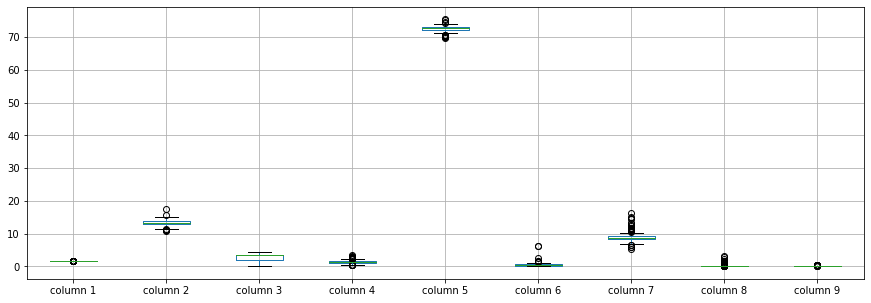

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518365
column 2    13.407850
column 3     2.684533
column 4     1.437783
column 5    72.646019
column 6     0.495660
column 7     8.953252
column 8     0.177536
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.191885,-0.122274,-0.394296,-0.541389,-0.289069,0.800678,0.005056,0.143010
column 2,-0.191885,1.000000,-0.273732,0.168174,-0.075041,-0.265408,-0.303016,0.327967,-0.241346
column 3,-0.122274,-0.273732,1.000000,-0.469038,-0.162379,0.004270,-0.449481,-0.499913,0.083060
column 4,-0.394296,0.168174,-0.469038,1.000000,0.026659,0.251287,-0.252554,0.496303,-0.067335
column 5,-0.541389,-0.075041,-0.162379,0.026659,1.000000,-0.194092,-0.204064,-0.110695,-0.090872
column 6,-0.289069,-0.265408,0.004270,0.251287,-0.194092,1.000000,-0.324939,-0.042497,-0.010460
column 7,0.800678,-0.303016,-0.449481,-0.252554,-0.204064,-0.324939,1.000000,-0.116064,0.119111
column 8,0.005056,0.327967,-0.499913,0.496303,-0.110695,-0.042497,-0.116064,1.000000,-0.057294
column 9,0.143010,-0.241346,0.083060,-0.067335,-0.090872,-0.010460,0.119111,-0.057294,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+18,9+18+18,9+18+18+18,9+18+18+18+18,9+18+18+18+18+18,9+18+18+18+18+18+18,9+18+18+18+18+18,9+18+18+18+18,9+18+18+18,9+18+18,9+18,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 101.06551830585187
Epoch: 1 , loss: 101.05731435922476
Epoch: 2 , loss: 101.00596853402945
Epoch: 3 , loss: 101.08453897329477
Epoch: 4 , loss: 100.94565758338341
Epoch: 5 , loss: 100.99863668588492
Epoch: 6 , loss: 100.96036999042218
Epoch: 7 , loss: 100.9286129291241
Epoch: 8 , loss: 101.34631758469801
Epoch: 9 , loss: 100.933229299692
Epoch: 10 , loss: 100.8718772301307
Epoch: 11 , loss: 100.90022219144382
Epoch: 12 , loss: 100.90521474984976
Epoch: 13 , loss: 100.90787564791165
Epoch: 14 , loss: 100.90767845740685
Epoch: 15 , loss: 100.90841087928185
Epoch: 16 , loss: 100.90987865741437
Epoch: 17 , loss: 101.29369060809796
Epoch: 18 , loss: 100.96351036658653
Epoch: 19 , loss: 100.8567616389348
Epoch: 20 , loss: 100.93243701641376
Epoch: 21 , loss: 100.97175422081581
Epoch: 22 , loss: 100.95120591383714
Epoch: 23 , loss: 100.90850125826321
Epoch: 24 , loss: 100.94056408221905
Epoch: 25 , loss: 100.8

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(129.09188615223644, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.1183855708467271

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_AL_1(imp).xlsx", index=False, header=False)